# (Rerun with 100k permutations) Compare PCA Methods & Visualize Individual SNPs

In [3]:
import sys,os
import pandas as pd
from numpy import *
from matplotlib.pyplot import *
from matplotlib.patches import Rectangle
%matplotlib inline
from sklearn.metrics import pairwise_distances
import glob
from scipy.stats import pearsonr
ion()

In [4]:
os.getcwd()
os.chdir('/mnt/DATA/bQTL_mapping_rerun')

## Compare PCA Methods

In [5]:
# Import significant bQTL list for both PCA methods
fname_45 = 'processed/PU1/qtltools_rr_45/output/cqn/results.genes.significant.txt'
fname_ceu = 'processed/PU1/qtltools_rr_ceu/output/cqn/results.genes.significant.txt'
fname_full = 'processed/PU1/qtltools_rr_full/output/cqn/results.genes.significant.txt'
sig_qtl_45 = pd.read_csv(fname_45, sep=' ', 
                          names = ['phe_id','phe_chr', 'phe_from', 'phe_to', 'phe_strd', 'n_var_in_cis', 'dist_phe_var', 
                                   'var_id', 'var_chr', 'var_from', 'var_to', 'dof1', 'dof2', 'bml1', 'bml2', 
                                   'nom_pval', 'r_squared', 'slope', 'adj_emp_pval', 'adj_beta_pval'], index_col=False)
sig_qtl_ceu = pd.read_csv(fname_ceu, sep=' ', 
                          names = ['phe_id','phe_chr', 'phe_from', 'phe_to', 'phe_strd', 'n_var_in_cis', 'dist_phe_var', 
                                   'var_id', 'var_chr', 'var_from', 'var_to', 'dof1', 'dof2', 'bml1', 'bml2', 
                                   'nom_pval', 'r_squared', 'slope', 'adj_emp_pval', 'adj_beta_pval'], index_col=False)
sig_qtl_full = pd.read_csv(fname_full, sep=' ', 
                          names = ['phe_id','phe_chr', 'phe_from', 'phe_to', 'phe_strd', 'n_var_in_cis', 'dist_phe_var', 
                                   'var_id', 'var_chr', 'var_from', 'var_to', 'dof1', 'dof2', 'bml1', 'bml2', 
                                   'nom_pval', 'r_squared', 'slope', 'adj_emp_pval', 'adj_beta_pval'], index_col=False)

In [31]:
# SNPs significant w Full but not 45
sig_qtl_full['var_id'][~sig_qtl_full['var_id'].isin(sig_qtl_45['var_id'])]

1       rs6684404
5      rs28739509
6       rs4450008
9        rs653049
11       rs816092
13      rs2486933
14    rs150217863
15     rs61769020
16     rs61808906
17      rs4987273
18      rs4915606
21      rs6541280
22     rs11580180
23     rs10922563
24     rs11205766
25      rs5004652
26      rs5006087
29       rs585259
30      rs2991953
32     rs34730227
34     rs11118467
37     rs76383089
Name: var_id, dtype: object

(0.994731278554481, 3.169270399030895e-11)


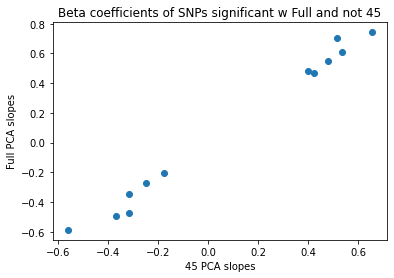

In [36]:
x_vec = [-0.559611, 0.512916, -0.368055, -0.31556, -0.313464,0.533468,
         0.65455,-0.177253,0.398165,0.422308,0.477707,-0.24859]
y_vec = [-0.588111, 0.706578, -0.493803, -0.473048, -0.343571, 0.608447,  
 0.742264, -0.204963,  0.479143,  0.467901, 0.551727,  -0.274894]
scatter(x_vec,y_vec)
xlabel('45 PCA slopes')
ylabel('Full PCA slopes')
title('Beta coefficients of SNPs significant w Full and not 45')
print(pearsonr(x_vec,y_vec))


In [33]:
sig_qtl_full['slope'][~sig_qtl_full['var_id'].isin(sig_qtl_45['var_id'])].values

array([-0.588111, -0.871097,  0.320213,  0.706578, -0.493803,  0.477704,
       -0.473048, -0.343571, -1.28736 ,  0.608447,  0.742264,  0.486275,
       -0.184458, -0.364439, -0.602499, -0.204963,  0.479143,  0.467901,
        0.551727,  0.488546,  1.0715  , -0.274894])

In [6]:
# Find overlapping bQTLs
a = asarray(sig_qtl_45['var_id'])
b = asarray(sig_qtl_ceu['var_id'])
c = asarray(sig_qtl_full['var_id'])
overlap_ids = list(set(a).intersection(set(b)).intersection(set(c)))
overlap_ids

['rs844004',
 'rs6426252',
 'rs2352794',
 'rs3010378',
 'rs72686003',
 'rs1737362',
 'rs6674401',
 'rs5018353',
 'rs563676212',
 'rs217474',
 'rs1499579',
 'rs12144817']

In [11]:
len(overlap_ids)

12

In [7]:
# Of the significant QTL lists, grab the subset of the overlapping bQTLs
overlap_45 = sig_qtl_45[sig_qtl_45['var_id'].isin(overlap_ids)]
overlap_ceu = sig_qtl_ceu[sig_qtl_ceu['var_id'].isin(overlap_ids)]
overlap_full = sig_qtl_full[sig_qtl_full['var_id'].isin(overlap_ids)]

Text(0, 0.5, '-log10(p-value) with Full PCA')

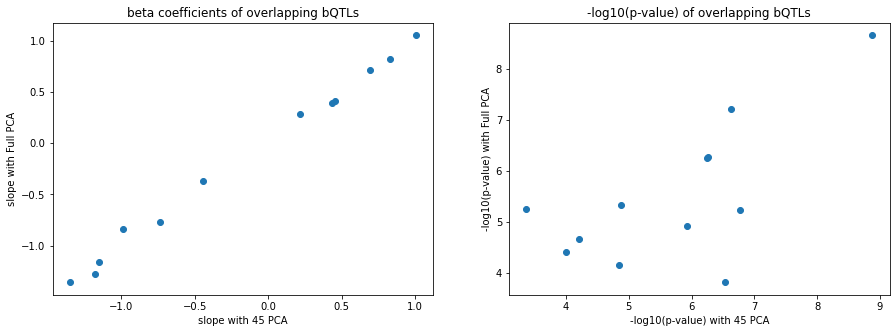

In [23]:
# Plot beta coefficients of linear regression
fig,ax = subplots(1,2,figsize=(15,5))
ax[0].scatter(overlap_45['slope'],overlap_full['slope'])
ax[0].set_title('beta coefficients of overlapping bQTLs')
ax[0].set_xlabel('slope with 45 PCA')
ax[0].set_ylabel('slope with Full PCA')

# Plot p values
ax[1].scatter(-log10(overlap_45['adj_beta_pval']),-log10(overlap_full['adj_beta_pval']))
ax[1].set_title('-log10(p-value) of overlapping bQTLs')
ax[1].set_xlabel('-log10(p-value) with 45 PCA')
ax[1].set_ylabel('-log10(p-value) with Full PCA')

# SNP annotation 
# annot = 'rs7521798'
# pointx = overlap_45[overlap_45['var_id'].str.contains(annot)]['slope']
# print(pointx)
# pointy = overlap_full[overlap_full['var_id'].str.contains(annot)]['slope']
# scatter(pointx,pointy,c='r')
# annotate(annot,(pointx,pointy))

In [19]:
print(pearsonr( -log10(overlap_full['adj_beta_pval']),-log10(overlap_45['adj_beta_pval']) ))
print(pearsonr( -log10(overlap_45['adj_beta_pval']),-log10(overlap_ceu['adj_beta_pval']) ))
print(pearsonr( -log10(overlap_full['adj_beta_pval']),-log10(overlap_ceu['adj_beta_pval']) ))


(0.2484370863185551, 0.43621210304823727)
(0.6731126857980718, 0.016435175561568784)
(0.20765312352963006, 0.5172418731583313)


In [20]:
print(pearsonr(overlap_45['slope'],overlap_ceu['slope']))
print(pearsonr(overlap_45['slope'],overlap_full['slope']))
print(pearsonr(overlap_full['slope'],overlap_ceu['slope']))

(0.9945834794309102, 3.6385461512472065e-11)
(0.9970800309746853, 1.6635163156980928e-12)
(0.9941559037407375, 5.316215202441145e-11)


## Visualize Individual SNPs

In [7]:
# Choosing rs7521798 
SNP = sig_qtl_45[sig_qtl_45['var_id'] == 'rs7521798']
SNP

,phe_id,phe_chr,phe_from,phe_to,phe_strd,n_var_in_cis,dist_phe_var,var_id,var_chr,var_from,var_to,dof1,dof2,bml1,bml2,nom_pval,r_squared,slope,adj_emp_pval,adj_beta_pval
2,1.206986735.206987086,1,206986736,206987086,+,214,0,rs7521798,1,206986926,206986926,43,37.1043,1.01013,24.3341,6.070530e-12,0.671041,-1.19768,0.0001,3.444820e-09


In [8]:
# Sample genotypes
het = ['NA06986', 'NA06994', 'NA07048', 'NA07357', 'NA10847', 'NA10851', 'NA11830', 'NA11832', 'NA11918', 
       'NA11931', 'NA11994', 'NA12154', 'NA12249', 'NA12282', 'NA12286', 'NA12383', 'NA12489', 'NA12761', 'NA12762', 
       'NA12763', 'NA12776', 'NA12812', 'NA12873']
hom_var = ['NA06985', 'NA07051', 'NA07056', 'NA11829', 'NA11831', 'NA11881', 'NA11894','NA11992', 'NA12005', 'NA12043', 'NA12275', 'NA12287', 'NA12814']
hom_ref = ['NA07037', 'NA11840', 'NA11920', 'NA12156', 'NA12234', 'NA12750', 'NA12760', 'NA12813', 'NA12815']

In [9]:
# Get the count matrix at the SNP corrected by two methods
fname_counts_45 = 'processed/PU1/qtltools_45_subsam_pca/input/cqn/corrected.bed'
counts_sub = pd.read_csv(fname_counts_45, sep='\t', index_col=False)
SNP_sub = counts_sub[counts_sub['id'].values == SNP['phe_id'].values]

fname_counts_full = 'processed/PU1/qtltools_full_pop_pca/input/cqn/corrected.bed'
counts_full = pd.read_csv(fname_counts_full, sep='\t', index_col=False)
SNP_full = counts_full[counts_full['id'].values == SNP['phe_id'].values]

Text(0.5, 1.0, 'rs7521798, Full PCA')

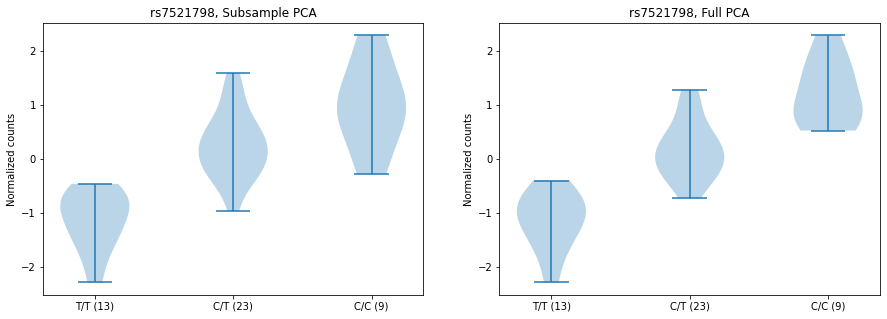

In [10]:
# Violin plot
fig,ax = subplots(1,2,figsize=(15,5))
labels = ['T/T (13)','C/T (23)','C/C (9)']

ax[0].violinplot([SNP_sub[hom_var].values[0],SNP_sub[het].values[0],SNP_sub[hom_ref].values[0]])
ax[0].set_xticks(arange(1, 1+len(labels)))
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Normalized counts')
ax[0].set_title('rs7521798, Subsample PCA')

ax[1].violinplot([SNP_full[hom_var].values[0],SNP_full[het].values[0],SNP_full[hom_ref].values[0]])
ax[1].set_xticks(arange(1, 1+len(labels)))
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('Normalized counts')
ax[1].set_title('rs7521798, Full PCA')

## Compare 45 subsample, CEU subsample, and full population PCAs
Compare variance

In [11]:
from cyvcf2 import VCF

In [12]:
# Import VCF (genotype)
vcf_fname = 'landerlab-vcf/1000_genomes_vcfs/Waszak_47_samples.chr1.vcf.gz'
vcf_reader = VCF(vcf_fname, gts012=True, lazy=True)

In [13]:
# Import count matrix (phenotype)
phe_ids = overlap_45['phe_id'].values # phenotype IDs of overlapping bQTLs
fname = 'processed/PU1/qtltools_45_subsam_pca/input/cqn/corrected.bed'
count_mat = pd.read_csv(fname, sep='\t', index_col=False)
counts_45 = count_mat[count_mat['id'].isin(phe_ids)]

fname = 'processed/PU1/qtltools/input/cqn/corrected.bed'
count_mat = pd.read_csv(fname, sep='\t', index_col=False)
counts_ceu = count_mat[count_mat['id'].isin(phe_ids)]

fname = 'processed/PU1/qtltools_full_pop_pca/input/cqn/corrected.bed'
count_mat = pd.read_csv(fname, sep='\t', index_col=False)
counts_full = count_mat[count_mat['id'].isin(phe_ids)]

In [14]:
sample_list = ["NA06985","NA06986","NA06994","NA07037","NA07048","NA07051","NA07056","NA07357","NA10847",
               "NA10851","NA11829","NA11830","NA11831","NA11832","NA11840","NA11881","NA11894","NA11918","NA11920",
               "NA11931","NA11992","NA11994","NA12005","NA12043","NA12154","NA12156","NA12234","NA12249",
               "NA12275","NA12282","NA12286","NA12287","NA12383","NA12489","NA12750","NA12760","NA12761","NA12762",
               "NA12763","NA12776","NA12812","NA12813","NA12814","NA12815","NA12873"]

In [15]:
# For each overlapping variant
variances_geno = zeros((3,3,11)) # (methods x genotype x bQTLs-overlap)
for idx,var_id in zip(range(len(overlap_ids)),overlap_ids): 
    variant_loc = overlap_45[overlap_45['var_id'] == var_id]['var_from']
    variant_phe_id = overlap_45[overlap_45['var_id'] == var_id]['phe_id'].values[0]
    region_lookup = '1:' + variant_loc.astype(str).values + '-' + variant_loc.astype(str).values
    print(array_str(region_lookup)[2:-2])
    # Get the sample genotypes
    vcf_reader = VCF(vcf_fname, gts012=True, lazy=True)
    for v in vcf_reader(array_str(region_lookup)[2:-2]):
        HOM_REF=[]; HET=[];HOM_ALT=[];
        HOM_REF = asarray(vcf_reader.samples)[v.gt_types==0] # HOM_REF
        HET = asarray(vcf_reader.samples)[v.gt_types==1] # HET
        HOM_ALT = asarray(vcf_reader.samples)[v.gt_types==2] # HOM_ALT
        break
    # Look up variant's phenotype ID in the count matrix
    var_counts_45 = counts_45[counts_45['id'] == variant_phe_id]
    var_counts_ceu = counts_ceu[counts_ceu['id'] == variant_phe_id]
    var_counts_full = counts_full[counts_full['id'] == variant_phe_id] #[sample_list]
    for idx1,geno in zip(range(3), [HOM_REF,HET,HOM_ALT]):
        variances_geno[0,idx1,idx] = var(var_counts_45[geno].values[0])
        variances_geno[1,idx1,idx] = var(var_counts_ceu[geno].values[0])
        variances_geno[2,idx1,idx] = var(var_counts_full[geno].values[0])

1:44534476-44534476
1:116185604-116185604
1:205792680-205792680
1:208516759-208516759
1:4105365-4105365
1:207001040-207001040
1:247639887-247639887
1:64029606-64029606
1:24054800-24054800
1:70499373-70499373
1:18328157-18328157


/home/jupyter/.conda/envs/PU1_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


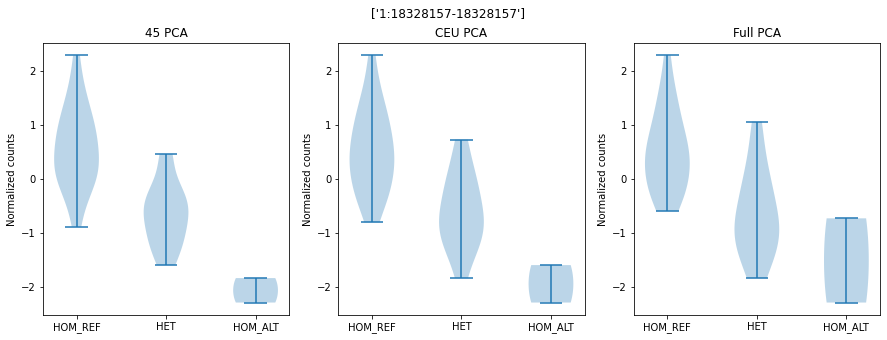

In [16]:
# Violin plot example 1
methods = ['45', 'CEU', 'Full']

fig,ax = subplots(1,3,figsize=(15,5))
fig.suptitle(region_lookup)
labels = ['HOM_REF','HET','HOM_ALT']
for k,count_vec in zip(range(3), [var_counts_45,var_counts_ceu,var_counts_full]):
    parts = ax[k].violinplot([count_vec[HOM_REF].values[0],count_vec[HET].values[0],count_vec[HOM_ALT].values[0]])
    ax[k].set_xticks(arange(1, 1+len(labels)))
    ax[k].set_xticklabels(labels)
    ax[k].set_ylabel('Normalized counts')
    ax[k].set_title(methods[k]+' PCA')

1:24054800-24054800


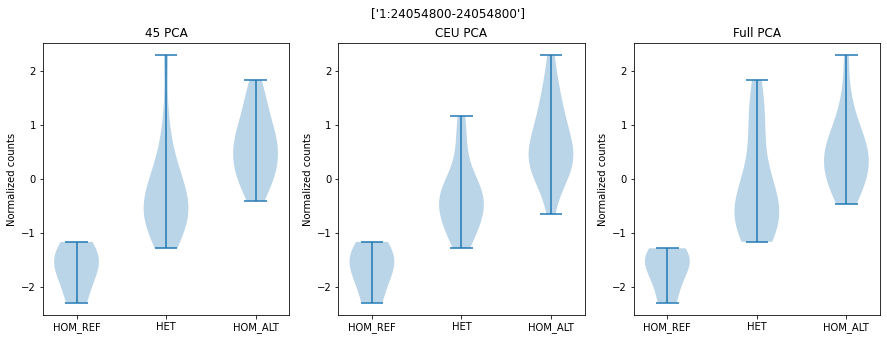

In [17]:
# Violin plot example 2
methods = ['45', 'CEU', 'Full']
ID = 'rs1737362'

# For each overlapping variant
variant_loc = overlap_45[overlap_45['var_id'] == ID]['var_from']
variant_phe_id = overlap_45[overlap_45['var_id'] == ID]['phe_id'].values[0]
region_lookup = '1:' + variant_loc.astype(str).values + '-' + variant_loc.astype(str).values
print(array_str(region_lookup)[2:-2])
# Get the sample genotypes
vcf_reader = VCF(vcf_fname, gts012=True, lazy=True)
for v in vcf_reader('1:24054800-24054800'):
    HOM_REF=[]; HET=[];HOM_ALT=[];
    HOM_REF = asarray(vcf_reader.samples)[v.gt_types==0] # HOM_REF
    HET = asarray(vcf_reader.samples)[v.gt_types==1] # HET
    HOM_ALT = asarray(vcf_reader.samples)[v.gt_types==2] # HOM_ALT
    break
# Look up variant's phenotype ID in the count matrix
var_counts_45 = []; var_counts_45 = []; var_counts_full = [];
var_counts_45 = counts_45[counts_45['id'] == variant_phe_id]
var_counts_ceu = counts_ceu[counts_ceu['id'] == variant_phe_id]
var_counts_full = counts_full[counts_full['id'] == variant_phe_id] #[sample_list]

fig,ax = subplots(1,3,figsize=(15,5))
fig.suptitle(region_lookup)
labels = ['HOM_REF','HET','HOM_ALT']
for k,count_vec in zip(range(3), [var_counts_45,var_counts_ceu,var_counts_full]):
    ax[k].violinplot([count_vec[HOM_REF].values[0],count_vec[HET].values[0],count_vec[HOM_ALT].values[0]])
    ax[k].set_xticks(arange(1, 1+len(labels)))
    ax[k].set_xticklabels(labels)
    ax[k].set_ylabel('Normalized counts')
    ax[k].set_title(methods[k]+' PCA')


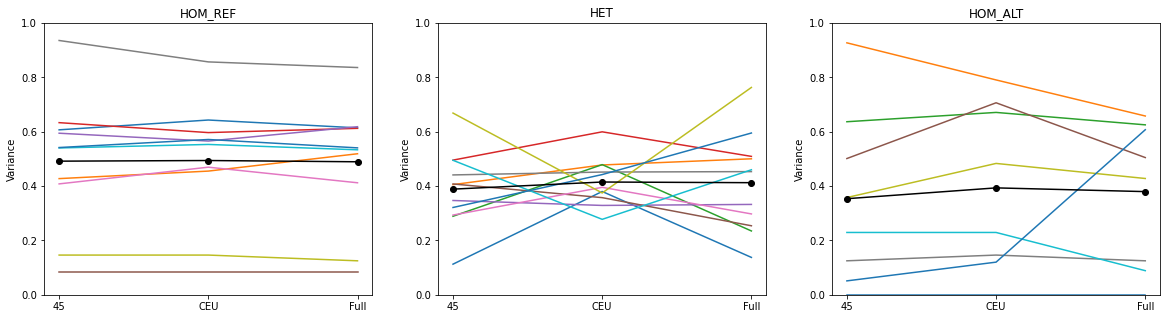

In [18]:
# Plot variances
methods = ['45', 'CEU', 'Full']
genotypes = ['HOM_REF','HET','HOM_ALT']
fig,ax = subplots(1,3,figsize=(20,5))
for k in range(3):
    ax[k].set_title(genotypes[k])
    ax[k].set_ylabel('Variance')
    ax[k].set_ylim([0,1])
    # Plot all 11 bQTLs
    for j in range(11):
        ax[k].plot(methods,variances_geno[:,k,j])
    # Plot average
    avg_45 = mean(variances_geno[0,k,:][~isnan(variances_geno[0,k,:])])
    avg_ceu = mean(variances_geno[1,k,:][~isnan(variances_geno[1,k,:])])
    avg_full = mean(variances_geno[2,k,:][~isnan(variances_geno[2,k,:])])
    ax[k].plot(methods,[avg_45,avg_ceu,avg_full], 'ko-')

## Looking at variance of peak counts - which method reduces variance the most

In [19]:
# Import count matrix (phenotype)
phe_ids = overlap_45['phe_id'].values # phenotype IDs of overlapping bQTLs
fname = 'processed/PU1/qtltools_45_subsam_pca/input/cqn/corrected.bed'
counts_45 = pd.read_csv(fname, sep='\t', index_col=False)

fname = 'processed/PU1/qtltools/input/cqn/corrected.bed'
counts_ceu = pd.read_csv(fname, sep='\t', index_col=False)

fname = 'processed/PU1/qtltools_full_pop_pca/input/cqn/corrected.bed'
counts_full = pd.read_csv(fname, sep='\t', index_col=False)


In [20]:
# Count matrix is 2663 peaks x 45 samples
# Take the variance of each sample column's counts
var_vec = zeros(45)
for k in range(45):
    var_vec[k] = var(counts_45[sample_list][sample_list[k]].values)
print('45')
print(mean(var_vec))
print(median(var_vec))

45
0.9645101238004059
0.9511859239484711


In [22]:
var_vec = zeros(45)
for k in range(45):
    var_vec[k] = var(counts_ceu[sample_list][sample_list[k]].values)
print('CEU')
print(mean(var_vec))
print(median(var_vec))

CEU
0.9645174736134011
0.9528542480170519


In [23]:
var_vec = zeros(45)
for k in range(45):
    var_vec[k] = var(counts_full[sample_list][sample_list[k]].values)
print('Full')
print(mean(var_vec))
print(median(var_vec))

Full
0.9650521941350353
0.9769800072084723
